In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3


sqlite3.connect('remote.db')
conn_s = sqlite3.connect('remote.db')

In [2]:
factresellersales = pd.read_sql_query(f"select * from factresellersales ",con=conn_s)

df = factresellersales.copy()

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60855 entries, 0 to 60854
Data columns (total 28 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   index                  60855 non-null  int64  
 1   ProductKey             60855 non-null  float64
 2   OrderDateKey           60855 non-null  float64
 3   DueDateKey             60855 non-null  float64
 4   ShipDateKey            60855 non-null  float64
 5   ResellerKey            60855 non-null  float64
 6   EmployeeKey            60855 non-null  float64
 7   PromotionKey           60855 non-null  float64
 8   CurrencyKey            60855 non-null  float64
 9   SalesTerritoryKey      60855 non-null  float64
 10  SalesOrderNumber       60855 non-null  object 
 11  SalesOrderLineNumber   60855 non-null  float64
 12  RevisionNumber         60855 non-null  float64
 13  OrderQuantity          60855 non-null  float64
 14  UnitPrice              60855 non-null  float64
 15  Ex

In [4]:
df.head()

,index,ProductKey,OrderDateKey,DueDateKey,ShipDateKey,ResellerKey,EmployeeKey,PromotionKey,CurrencyKey,SalesTerritoryKey,...,ProductStandardCost,TotalProductCost,SalesAmount,TaxAmt,Freight,CarrierTrackingNumber,CustomerPONumber,OrderDate,DueDate,ShipDate
0,0,349.0,20101229.0,20110110.0,20110105.0,676.0,285.0,1.0,100.0,5.0,...,1898.0944,1898.0944,2024.994,161.9995,50.6249,4911-403C-98,PO522145787,2010-12-29 00:00:00.000000,2011-01-10 00:00:00.000000,2011-01-05 00:00:00.000000
1,1,350.0,20101229.0,20110110.0,20110105.0,676.0,285.0,1.0,100.0,5.0,...,1898.0944,5694.2832,6074.982,485.9986,151.8746,4911-403C-98,PO522145787,2010-12-29 00:00:00.000000,2011-01-10 00:00:00.000000,2011-01-05 00:00:00.000000
2,2,351.0,20101229.0,20110110.0,20110105.0,676.0,285.0,1.0,100.0,5.0,...,1898.0944,1898.0944,2024.994,161.9995,50.6249,4911-403C-98,PO522145787,2010-12-29 00:00:00.000000,2011-01-10 00:00:00.000000,2011-01-05 00:00:00.000000
3,3,344.0,20101229.0,20110110.0,20110105.0,676.0,285.0,1.0,100.0,5.0,...,1912.1544,1912.1544,2039.994,163.1995,50.9999,4911-403C-98,PO522145787,2010-12-29 00:00:00.000000,2011-01-10 00:00:00.000000,2011-01-05 00:00:00.000000
4,4,345.0,20101229.0,20110110.0,20110105.0,676.0,285.0,1.0,100.0,5.0,...,1912.1544,1912.1544,2039.994,163.1995,50.9999,4911-403C-98,PO522145787,2010-12-29 00:00:00.000000,2011-01-10 00:00:00.000000,2011-01-05 00:00:00.000000


In [5]:
df.columns

Index(['index', 'ProductKey', 'OrderDateKey', 'DueDateKey', 'ShipDateKey',
       'ResellerKey', 'EmployeeKey', 'PromotionKey', 'CurrencyKey',
       'SalesTerritoryKey', 'SalesOrderNumber', 'SalesOrderLineNumber',
       'RevisionNumber', 'OrderQuantity', 'UnitPrice', 'ExtendedAmount',
       'UnitPriceDiscountPct', 'DiscountAmount', 'ProductStandardCost',
       'TotalProductCost', 'SalesAmount', 'TaxAmt', 'Freight',
       'CarrierTrackingNumber', 'CustomerPONumber', 'OrderDate', 'DueDate',
       'ShipDate'],
      dtype='object')

In [6]:
df['OrderQuantity'].unique()

array([ 1.,  3.,  2.,  6.,  4.,  5.,  7.,  9.,  8., 10., 12., 13., 21.,
       14., 11., 26., 22., 23., 18., 16., 15., 19., 32., 17., 35., 34.,
       27., 33., 24., 20., 29., 28., 25., 39., 31., 44., 36., 40., 30.,
       38., 41.])

count    60855.000000
mean         3.522767
std          3.033387
min          1.000000
25%          2.000000
50%          3.000000
75%          4.000000
max         44.000000
Name: OrderQuantity, dtype: object


(array([3.8761e+04, 1.1870e+04, 5.0320e+03, 2.3580e+03, 1.1600e+03,
        6.9600e+02, 5.1700e+02, 1.9500e+02, 9.9000e+01, 4.3000e+01,
        4.2000e+01, 3.2000e+01, 1.5000e+01, 9.0000e+00, 1.3000e+01,
        5.0000e+00, 2.0000e+00, 2.0000e+00, 3.0000e+00, 1.0000e+00]),
 array([ 1.  ,  3.15,  5.3 ,  7.45,  9.6 , 11.75, 13.9 , 16.05, 18.2 ,
        20.35, 22.5 , 24.65, 26.8 , 28.95, 31.1 , 33.25, 35.4 , 37.55,
        39.7 , 41.85, 44.  ]),
 <BarContainer object of 20 artists>)

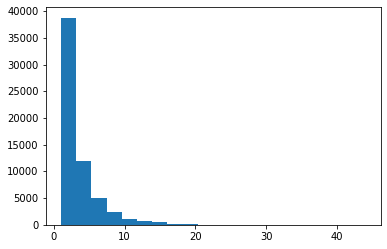

In [7]:
print(df['OrderQuantity'].describe().apply(lambda x: format(x, 'f')))

plt.hist(df.OrderQuantity, 20)

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

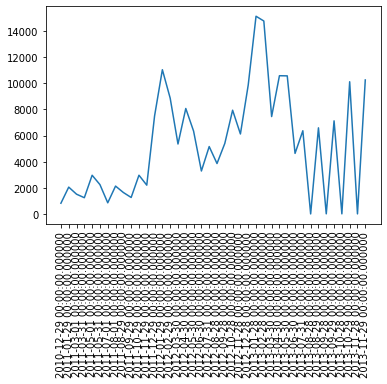

In [8]:
img = df.groupby('OrderDate', as_index = False)['OrderQuantity'].sum()
plt.plot(img.OrderDate, img.OrderQuantity)
plt.xticks( rotation='vertical')

([0, 1, 2, 3, 4, 5, 6, 7],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

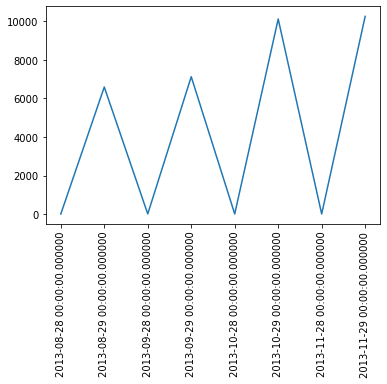

In [9]:
img = df[df['OrderDate'] >= '2013-08-01'].groupby('OrderDate', as_index = False)['OrderQuantity'].sum()
plt.plot(img.OrderDate, img.OrderQuantity)
plt.xticks( rotation='vertical')

In [10]:
df['normalized_OrderDateKey'] = pd.to_datetime(df.OrderDateKey, format='%Y%m%d')
df.normalized_OrderDateKey

0       2010-12-29
1       2010-12-29
2       2010-12-29
3       2010-12-29
4       2010-12-29
           ...    
60850   2013-11-29
60851   2013-11-29
60852   2013-11-29
60853   2013-11-29
60854   2013-11-29
Name: normalized_OrderDateKey, Length: 60855, dtype: datetime64[ns]

(array([15949., 15963., 15979., 15993., 16010., 16024., 16040.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

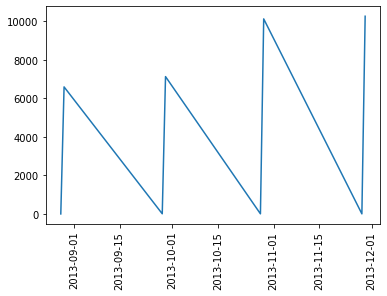

In [11]:
img = df[df['normalized_OrderDateKey'] >= '2013-08-01'].groupby('normalized_OrderDateKey', as_index = False)['OrderQuantity'].sum()
plt.plot(img.normalized_OrderDateKey, img.OrderQuantity)
plt.xticks( rotation='vertical')

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

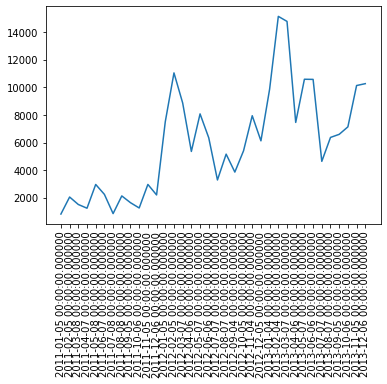

In [12]:
img = df.groupby('ShipDate', as_index = False)['OrderQuantity'].sum()
plt.plot(img.ShipDate, img.OrderQuantity)
plt.xticks( rotation='vertical')

([0, 1, 2, 3, 4],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

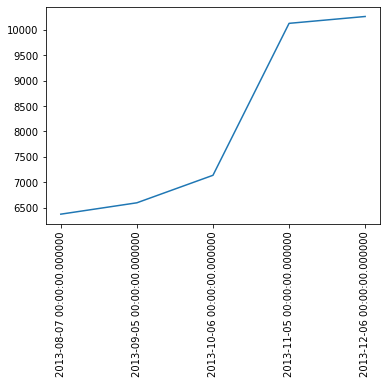

In [13]:
img = df[df['ShipDate'] >= '2013-08-01'].groupby('ShipDate', as_index = False)['OrderQuantity'].sum()
plt.plot(img.ShipDate, img.OrderQuantity)
plt.xticks( rotation='vertical')

In [14]:
df[df['OrderDate'] >= '2013-10-01' ][['OrderDate', 'ShipDate', 'UnitPrice', 'OrderQuantity']]

,OrderDate,ShipDate,UnitPrice,OrderQuantity
55004,2013-10-28 00:00:00.000000,2013-11-05 00:00:00.000000,29.994,2.0
55005,2013-10-28 00:00:00.000000,2013-11-05 00:00:00.000000,5.394,4.0
55006,2013-10-29 00:00:00.000000,2013-11-05 00:00:00.000000,112.998,1.0
55007,2013-10-29 00:00:00.000000,2013-11-05 00:00:00.000000,323.994,1.0
55008,2013-10-29 00:00:00.000000,2013-11-05 00:00:00.000000,818.700,1.0
...,...,...,...,...
60850,2013-11-29 00:00:00.000000,2013-12-06 00:00:00.000000,158.430,2.0
60851,2013-11-29 00:00:00.000000,2013-12-06 00:00:00.000000,809.760,1.0
60852,2013-11-29 00:00:00.000000,2013-12-06 00:00:00.000000,818.700,4.0
60853,2013-11-29 00:00:00.000000,2013-12-06 00:00:00.000000,32.394,3.0


count    60855.000000
mean       444.431119
std        520.011858
min          1.328200
25%         34.925000
50%        209.256000
75%        672.294000
max       2146.962000
Name: UnitPrice, dtype: object


(array([2.3863e+04, 6.6850e+03, 8.6700e+02, 6.4610e+03, 4.9460e+03,
        1.7470e+03, 3.7250e+03, 1.7150e+03, 1.1460e+03, 9.8300e+02,
        1.0000e+00, 1.7270e+03, 2.2550e+03, 2.8820e+03, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 6.7000e+02, 1.1820e+03]),
 array([1.32820000e+00, 1.08609890e+02, 2.15891580e+02, 3.23173270e+02,
        4.30454960e+02, 5.37736650e+02, 6.45018340e+02, 7.52300030e+02,
        8.59581720e+02, 9.66863410e+02, 1.07414510e+03, 1.18142679e+03,
        1.28870848e+03, 1.39599017e+03, 1.50327186e+03, 1.61055355e+03,
        1.71783524e+03, 1.82511693e+03, 1.93239862e+03, 2.03968031e+03,
        2.14696200e+03]),
 <BarContainer object of 20 artists>)

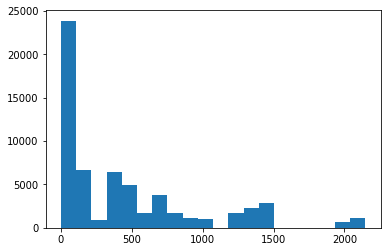

In [15]:
print(df['UnitPrice'].describe().apply(lambda x: format(x, 'f')))
plt.hist(df.UnitPrice, 20)

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

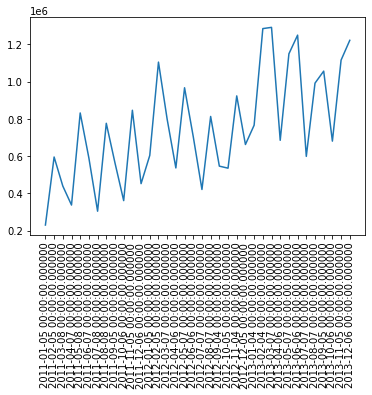

In [16]:
img = df.groupby('ShipDate', as_index = False)['UnitPrice'].sum()
plt.plot(img.ShipDate, img.UnitPrice)
plt.xticks( rotation='vertical')

In [17]:
df[['OrderDate', 'ShipDate']]

,OrderDate,ShipDate
0,2010-12-29 00:00:00.000000,2011-01-05 00:00:00.000000
1,2010-12-29 00:00:00.000000,2011-01-05 00:00:00.000000
2,2010-12-29 00:00:00.000000,2011-01-05 00:00:00.000000
3,2010-12-29 00:00:00.000000,2011-01-05 00:00:00.000000
4,2010-12-29 00:00:00.000000,2011-01-05 00:00:00.000000
...,...,...
60850,2013-11-29 00:00:00.000000,2013-12-06 00:00:00.000000
60851,2013-11-29 00:00:00.000000,2013-12-06 00:00:00.000000
60852,2013-11-29 00:00:00.000000,2013-12-06 00:00:00.000000
60853,2013-11-29 00:00:00.000000,2013-12-06 00:00:00.000000
